In [86]:
# pandas 이용
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # 파일 오류 무시

base_url = 'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page=1'
temp = pd.read_html(base_url, encoding='cp949', header = 1)
temp

[           날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
 0  2024.06.27  1386.9   7.6  1411.17  1362.63  1400.4  1373.4
 1  2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
 2  2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
 3  2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
 4  2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4
 5  2024.06.20  1392.0   9.0  1416.36  1367.64  1405.6  1378.4
 6  2024.06.19  1383.0   1.0  1407.20  1358.80  1396.5  1369.5
 7  2024.06.18  1382.0   0.0  1406.18  1357.82  1395.5  1368.5
 8  2024.06.17  1382.0   7.0  1406.18  1357.82  1395.5  1368.5
 9  2024.06.14  1389.0  11.0  1413.30  1364.70  1402.6  1375.4]

In [87]:
# 실제 데이터 확인
temp[0]

,날짜,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1386.9,7.6,1411.17,1362.63,1400.4,1373.4
1,2024.06.26,1394.5,2.5,1418.90,1370.10,1408.1,1380.9
2,2024.06.25,1392.0,4.0,1416.36,1367.64,1405.6,1378.4
3,2024.06.24,1388.0,3.0,1412.29,1363.71,1401.6,1374.4
4,2024.06.21,1391.0,1.0,1415.34,1366.66,1404.6,1377.4
5,2024.06.20,1392.0,9.0,1416.36,1367.64,1405.6,1378.4
6,2024.06.19,1383.0,1.0,1407.20,1358.80,1396.5,1369.5
7,2024.06.18,1382.0,0.0,1406.18,1357.82,1395.5,1368.5
8,2024.06.17,1382.0,7.0,1406.18,1357.82,1395.5,1368.5
9,2024.06.14,1389.0,11.0,1413.30,1364.70,1402.6,1375.4


In [88]:
# 1~10페이지까지 추출
df = pd.DataFrame()
for page_num in range(1,11,1):
    url = f'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page={page_num}'
    temp_num = pd.read_html(url, encoding='cp949', header = 1)
    df = pd.concat([df,temp_num[0]])

In [89]:
df.info() # 추출한 데이터 확인

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   전일대비    100 non-null    float64
 3   사실 때    100 non-null    float64
 4   파실 때    100 non-null    float64
 5   보내실 때   100 non-null    float64
 6   받으실 때   100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [90]:
# 여러 국가의 환율을 1~10페이지까지 추출
currency_code = int(input('통화유형을 선택해주세요(0:USD, 1:EUR, 2:JPY): '))
currency_type = ['USD', 'EUR', 'JPY']
currency_name = ['미국 달러', '유럽연합 유로', '일본 엔(100)']
currency_symbols = ['$','€', '¥']
selected = currency_type[currency_code]
df_selected = pd.DataFrame()
for page_num in range(1,11,1):
    url = f'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{selected}KRW&page={page_num}'
    temp_num = pd.read_html(url, encoding='cp949', header = 1)
    df_selected = pd.concat([df_selected,temp_num[0]])
    
#데이터 표시
print(f'''==={currency_name[currency_code]} - {selected}({currency_symbols[currency_code]})===
{df_selected.head()}
{df_selected.shape}
''')

===유럽연합 유로 - EUR(€)===
           날짜    매매기준율  전일대비     사실 때     파실 때    보내실 때    받으실 때
0  2024.06.27  1482.87  6.46  1512.37  1453.37  1497.69  1468.05
1  2024.06.26  1489.33  1.78  1518.96  1459.70  1504.22  1474.44
2  2024.06.25  1491.11  1.16  1520.78  1461.44  1506.02  1476.20
3  2024.06.24  1489.95  2.48  1519.60  1460.30  1504.84  1475.06
4  2024.06.21  1487.47  2.39  1517.07  1457.87  1502.34  1472.60
(100, 7)



In [91]:
# 변경 전 요약
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   전일대비    100 non-null    float64
 3   사실 때    100 non-null    float64
 4   파실 때    100 non-null    float64
 5   보내실 때   100 non-null    float64
 6   받으실 때   100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [92]:
# 원하는 열만 선택
print(f'변경 전: {df_selected.shape}')
df_selected = df_selected.drop(['전일대비'],axis=1)
print(f'변경 후: {df_selected.shape}')

변경 전: (100, 7)
변경 후: (100, 6)


In [93]:
# 변경 후 요약
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   사실 때    100 non-null    float64
 3   파실 때    100 non-null    float64
 4   보내실 때   100 non-null    float64
 5   받으실 때   100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


# 전체 데이터 시각화

In [114]:
# 차트에 한글 글자 깨짐 방지
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

# 차트 그리기용 데이터 복사
df_total_chart = df_selected.copy()
df_total_chart = df_total_chart.set_index('날짜')

In [115]:
df_total_chart # 데이터 조회

,매매기준율,사실 때,파실 때,보내실 때,받으실 때
날짜,,,,,
2024.06.27,1482.87,1512.37,1453.37,1497.69,1468.05
2024.06.26,1489.33,1518.96,1459.70,1504.22,1474.44
2024.06.25,1491.11,1520.78,1461.44,1506.02,1476.20
2024.06.24,1489.95,1519.60,1460.30,1504.84,1475.06
2024.06.21,1487.47,1517.07,1457.87,1502.34,1472.60
...,...,...,...,...,...
2024.02.05,1434.46,1463.00,1405.92,1448.80,1420.12
2024.02.02,1444.78,1473.53,1416.03,1459.22,1430.34
2024.02.01,1447.06,1475.85,1418.27,1461.53,1432.59


<Axes: xlabel='날짜'>

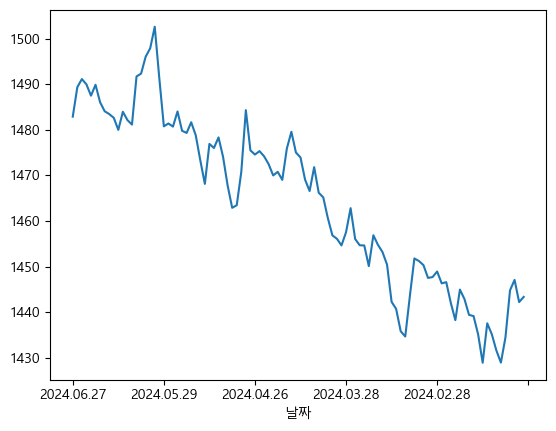

In [116]:
# 차트 그리기
df_total_chart ['매매기준율'].plot()

In [117]:
# 최신데이터와 가장 오래된 데이터 정렬 뒤집기
df_total_chart = df_total_chart[::-1]
df_total_chart

,매매기준율,사실 때,파실 때,보내실 때,받으실 때
날짜,,,,,
2024.01.30,1443.34,1472.06,1414.62,1457.77,1428.91
2024.01.31,1442.20,1470.89,1413.51,1456.62,1427.78
2024.02.01,1447.06,1475.85,1418.27,1461.53,1432.59
2024.02.02,1444.78,1473.53,1416.03,1459.22,1430.34
2024.02.05,1434.46,1463.00,1405.92,1448.80,1420.12
...,...,...,...,...,...
2024.06.21,1487.47,1517.07,1457.87,1502.34,1472.60
2024.06.24,1489.95,1519.60,1460.30,1504.84,1475.06
2024.06.25,1491.11,1520.78,1461.44,1506.02,1476.20


<Axes: xlabel='날짜'>

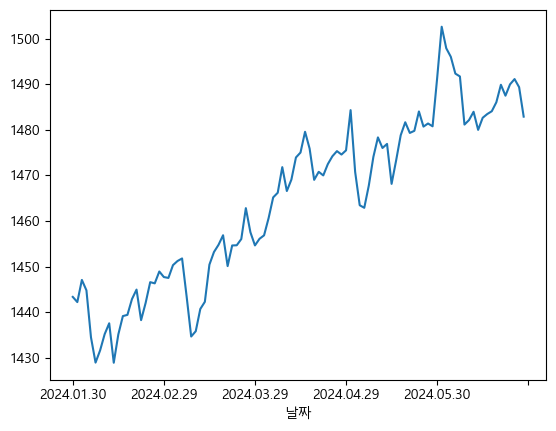

In [118]:
# 차트 그리기
df_total_chart ['매매기준율'].plot()

<Axes: title={'center': 'exchange rate'}, xlabel='날짜'>

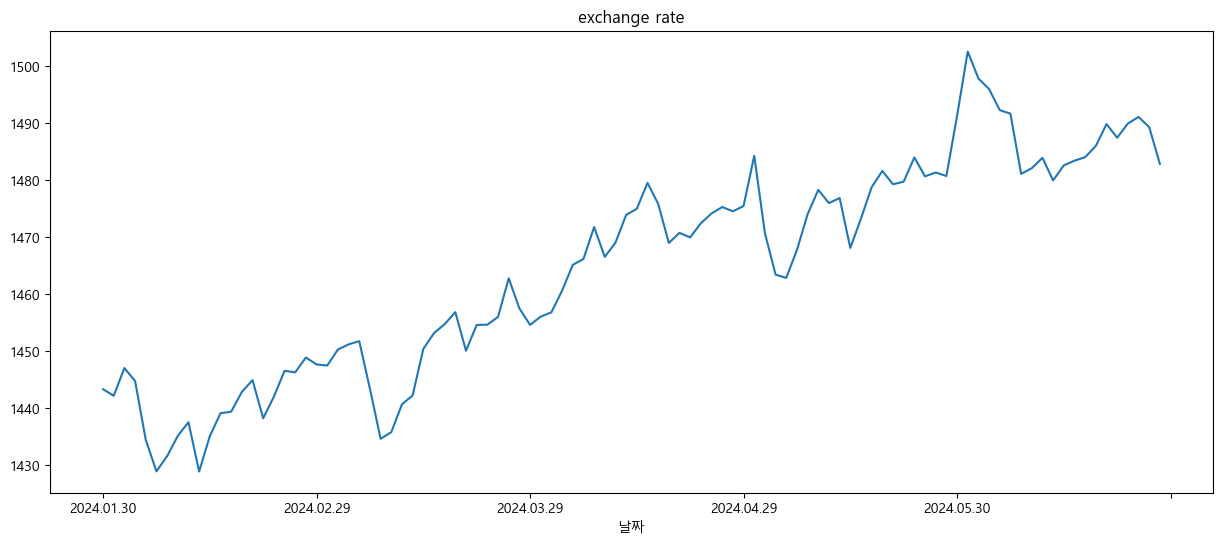

In [122]:
# 차트 크기 변경
# 튜플() 형식으로 변경하고 싶은 정보 넣기
df_total_chart ['매매기준율'].plot(figsize=(15,6), title = 'exchange rate') # figsize 단위는 inch

# 월별 검색

In [124]:
df_selected # 기존 데이터 조회

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1482.87,1512.37,1453.37,1497.69,1468.05
1,2024.06.26,1489.33,1518.96,1459.70,1504.22,1474.44
2,2024.06.25,1491.11,1520.78,1461.44,1506.02,1476.20
3,2024.06.24,1489.95,1519.60,1460.30,1504.84,1475.06
4,2024.06.21,1487.47,1517.07,1457.87,1502.34,1472.60
...,...,...,...,...,...,...
5,2024.02.05,1434.46,1463.00,1405.92,1448.80,1420.12
6,2024.02.02,1444.78,1473.53,1416.03,1459.22,1430.34
7,2024.02.01,1447.06,1475.85,1418.27,1461.53,1432.59
8,2024.01.31,1442.20,1470.89,1413.51,1456.62,1427.78


In [129]:
# 날짜 데이터 str → datetime 변환
df_selected['날짜'] = df_selected['날짜'].str.replace(".",'').astype('datetime64[ms]')
df_selected

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024-06-27,1482.87,1512.37,1453.37,1497.69,1468.05
1,2024-06-26,1489.33,1518.96,1459.70,1504.22,1474.44
2,2024-06-25,1491.11,1520.78,1461.44,1506.02,1476.20
3,2024-06-24,1489.95,1519.60,1460.30,1504.84,1475.06
4,2024-06-21,1487.47,1517.07,1457.87,1502.34,1472.60
...,...,...,...,...,...,...
5,2024-02-05,1434.46,1463.00,1405.92,1448.80,1420.12
6,2024-02-02,1444.78,1473.53,1416.03,1459.22,1430.34
7,2024-02-01,1447.06,1475.85,1418.27,1461.53,1432.59
8,2024-01-31,1442.20,1470.89,1413.51,1456.62,1427.78


In [130]:
# 변경된 정보 조회
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [131]:
# 년도 파생변수 생성
df_selected['년도'] = df_selected['날짜'].dt.year
# 월 파생변수 생성
df_selected['월'] = df_selected['날짜'].dt.month
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
 6   년도      100 non-null    int32         
 7   월       100 non-null    int32         
dtypes: datetime64[ms](1), float64(5), int32(2)
memory usage: 6.2 KB


In [155]:
# 사용자가 입력한 월의 정보를 필터링하는 df 생성
month_in = int(input('검색할 월입력(예:9): '))

month_df = df_selected.loc[df_selected['월'] == month_in].drop(['년도','월'], axis=1)
month_df

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
8,2024-05-31,1502.59,1532.49,1472.69,1517.61,1487.57
9,2024-05-30,1491.29,1520.96,1461.62,1506.20,1476.38
0,2024-05-29,1480.75,1510.21,1451.29,1495.55,1465.95
1,2024-05-28,1481.37,1510.84,1451.90,1496.18,1466.56
2,2024-05-27,1480.69,1510.15,1451.23,1495.49,1465.89
3,2024-05-24,1484.01,1513.54,1454.48,1498.85,1469.17
4,2024-05-23,1479.76,1509.20,1450.32,1494.55,1464.97
5,2024-05-22,1479.30,1508.73,1449.87,1494.09,1464.51
6,2024-05-21,1481.64,1511.12,1452.16,1496.45,1466.83
7,2024-05-20,1478.79,1508.21,1449.37,1493.57,1464.01


In [157]:
# 데이터 재정렬
month_df[::1].reset_index(drop=True)

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024-05-31,1502.59,1532.49,1472.69,1517.61,1487.57
1,2024-05-30,1491.29,1520.96,1461.62,1506.20,1476.38
2,2024-05-29,1480.75,1510.21,1451.29,1495.55,1465.95
3,2024-05-28,1481.37,1510.84,1451.90,1496.18,1466.56
4,2024-05-27,1480.69,1510.15,1451.23,1495.49,1465.89
5,2024-05-24,1484.01,1513.54,1454.48,1498.85,1469.17
6,2024-05-23,1479.76,1509.20,1450.32,1494.55,1464.97
7,2024-05-22,1479.30,1508.73,1449.87,1494.09,1464.51
8,2024-05-21,1481.64,1511.12,1452.16,1496.45,1466.83
9,2024-05-20,1478.79,1508.21,1449.37,1493.57,1464.01


In [160]:
# 차트를 그릴 데이터셋 복제
month_df_chart = month_df.copy()
month_df_chart = month_df_chart.set_index('날짜')

<Axes: xlabel='날짜'>

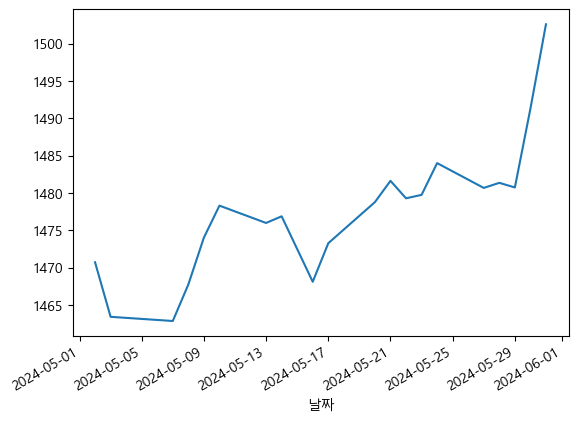

In [161]:
# 선택한 달의 매매기준율 차트 그리기
month_df_chart['매매기준율'].plot()